# Projet Machine Learning: cas de Classification

## Objectif:
- Développement d'un bon modèle de classification

## Principales Etapes d'un projet Machine Learning
- 1. Récupération et vérification des données
- 2. Exploration et préparation des données
- 3. Développement des modèles
- 4. Evaluation des modèles
- 5. Sauvegarde des modèles

## 1. Récupération et vérification des données

### Importation des bibliothèques

In [1]:
# Manipulation et exploration des données
import pandas as pd
import numpy as np
# Exploration graphique
import matplotlib.pyplot as plt
import seaborn as sns

#Insérer des images et filtrer les messages d'avertissements
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv("Data.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.columns

In [4]:
data = pd.read_csv("Data.csv", usecols=[ 'Survived', 'Pclass', 'Sex', 'Age',
       'SibSp','Parch', 'Fare', 'Embarked'])
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


## 2. Exploration et préparation des données

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
data.duplicated().sum()

111

**Exploration visuelle et statistique des variables catégorielles**

In [8]:
data["Survived"]=pd.Categorical(data["Survived"])
data["Sex"]=pd.Categorical(data["Sex"])
data["SibSp"]=pd.Categorical(data["SibSp"])
data["Parch"]=pd.Categorical(data["Parch"])
data["Pclass"]=pd.Categorical(data["Pclass"])
data["Embarked"]=pd.Categorical(data["Embarked"])

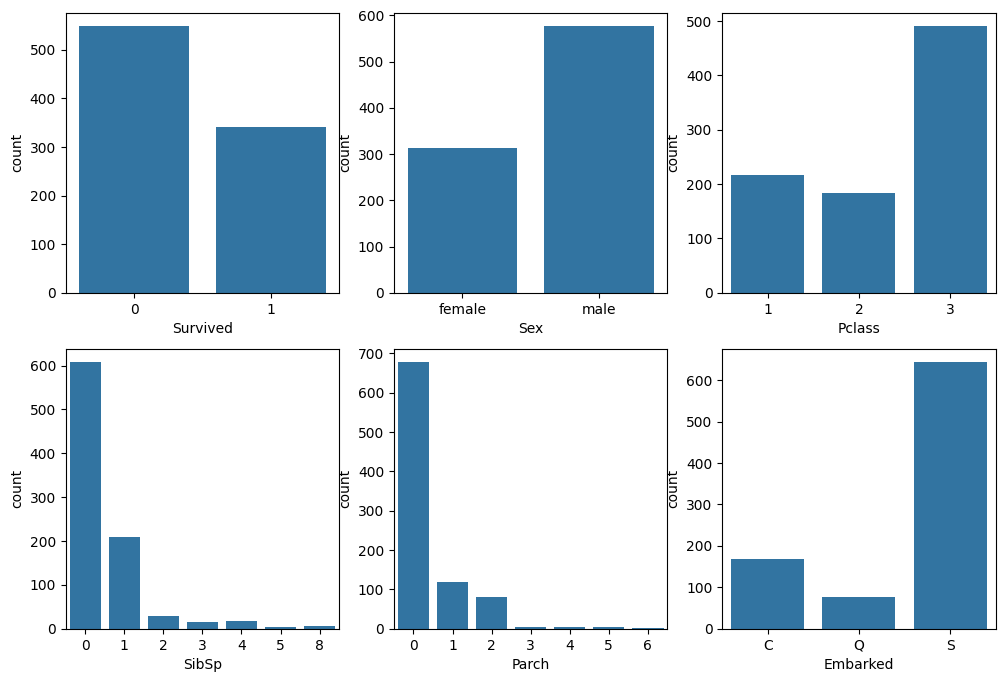

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(12,8), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})
sns.countplot(data, x=data['Survived'],ax = axs[0,0] );
sns.countplot(data, x=data['Sex'],ax = axs[0,1] );
sns.countplot(data, x=data['Pclass'],ax = axs[0,2] );
sns.countplot(data, x=data['SibSp'],ax = axs[1,0] );
sns.countplot(data, x=data['Parch'],ax = axs[1,1] );
sns.countplot(data, x=data['Embarked'],ax = axs[1,2] );

**Exploration visuelle et statistique des variables numériques**

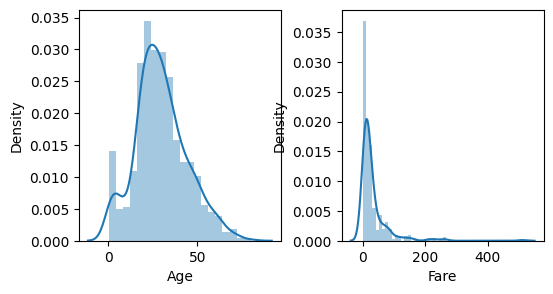

In [11]:
fig, axs = plt.subplots(1,2,figsize=(6,3), gridspec_kw={'wspace': 0.3})
sns.distplot(data['Age'], ax = axs[0])
sns.distplot(data['Fare'], ax = axs[1])
plt.show()

In [12]:
Asy_Fare = 3*(data["Fare"].mean() - data["Fare"].median())/data["Fare"].std()
Asy_Age = 3*(data["Age"].mean() - data["Age"].median())/data["Age"].std()
Asy_Fare, Asy_Age

(1.0715707369956913, 0.35090034607519827)

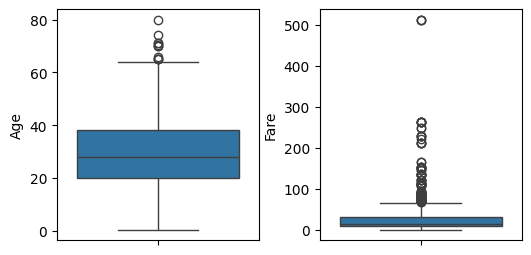

In [13]:
fig, axs = plt.subplots(1,2,figsize=(6,3), gridspec_kw={'wspace': 0.3})
sns.boxplot(data['Age'], ax = axs[0])
sns.boxplot(data['Fare'], ax = axs[1])
plt.show()

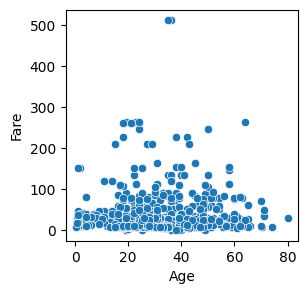

In [16]:
plt.figure(figsize=(3,3))
sns.scatterplot(x=data["Age"], y= data["Fare"]);

**Suppression des données dupliquées**

In [14]:
data = data.drop_duplicates()
data.duplicated().sum()

0

**Suppression des modalités les moins représentatives**

In [15]:
Parach_3456 = data[(data["Parch"]==3)|(data["Parch"]==4)|(data["Parch"]==5)|(data["Parch"]==6)]
SibSp_58 = data[(data["SibSp"]==5)|(data["SibSp"]==8)]
Parach_3456.shape, SibSp_58.shape

((15, 8), (7, 8))

In [17]:
Parach_3456.index, SibSp_58.index

(Index([13, 25, 86, 167, 360, 437, 438, 567, 610, 638, 678, 736, 774, 858, 885], dtype='int64'),
 Index([59, 71, 159, 180, 386, 480, 683], dtype='int64'))

In [18]:
data = data.drop(Parach_3456.index)
data = data.drop(SibSp_58.index)

**Traitement des données manquantes**

In [19]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         102
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [20]:
data["Age"]= data["Age"].fillna(data["Age"].mode()[0])
data["Embarked"]= data["Embarked"].fillna(data["Embarked"].mode()[0])
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Traitement des données aberrantes**

In [22]:
Q1 = data["Age"].quantile(0.25)
Q3 = data["Age"].quantile(0.75)
IQR = Q3-Q1
Q1, Q3, IQR

(22.0, 36.0, 14.0)

In [23]:
Minimum = Q1 - 1.5*IQR
Maximum = Q3 + 1.5*IQR
Minimum, Maximum


(1.0, 57.0)

In [24]:
outlier_Age = data[(data["Age"]<Minimum) | (data["Age"]>Maximum) ]
outlier_Age.shape, outlier_Age.index

((37, 8),
 Index([ 11,  33,  54,  78,  94,  96, 116, 170, 195, 232, 252, 268, 275, 280,
        305, 326, 366, 456, 469, 483, 487, 493, 545, 570, 587, 625, 630, 659,
        672, 684, 694, 745, 755, 803, 829, 831, 851],
       dtype='int64'))

In [26]:
data["z-Fare"]=(data["Fare"]-data["Fare"].mean())/data["Fare"].std()
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,z-Fare
0,0,3,male,22.0,1,0,7.2500,S,-0.520004
1,1,1,female,38.0,1,0,71.2833,C,0.704129
2,1,3,female,26.0,0,0,7.9250,S,-0.507100
3,1,1,female,35.0,1,0,53.1000,S,0.356516
4,0,3,male,35.0,0,0,8.0500,S,-0.504710


In [27]:
outlier_Fare = data[(data["z-Fare"]<-3) | (data["z-Fare"]>3) ]
outlier_Fare.shape, outlier_Fare.index

((19, 9),
 Index([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 527, 557, 679, 689, 700,
        716, 730, 737, 742, 779],
       dtype='int64'))

In [28]:
data = data.drop(["z-Fare"], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
outlier_Fare = outlier_Fare.drop(["z-Fare"], axis=1)
outlier_Fare.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.0,3,2,263.0000,S
88,1,1,female,23.0,3,2,263.0000,S
118,0,1,male,24.0,0,1,247.5208,C
258,1,1,female,35.0,0,0,512.3292,C
299,1,1,female,50.0,0,1,247.5208,C


In [30]:
outliers = pd.concat([ outlier_Age , outlier_Fare ]  )
outliers.shape

(56, 8)

In [31]:
data = data.drop(outliers.index)

In [32]:
data.shape


(702, 8)

### Feature Engineering

In [33]:
data["Sex_c"]=data["Sex"].map({"female":0, "male":1}).astype(int)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_c
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [34]:
Embarked_c=pd.get_dummies( data["Embarked"], prefix="Embarked", drop_first=True
                          ,dtype=int )
Embarked_c.head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [35]:
data= pd.concat([data, Embarked_c], axis=1 )
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_c,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


**Feature Engineering des variables numérique**

- Normalisation des variables numériques

In [37]:
min_age = data['Age'].min()
max_age=data['Age'].max()
min_fare = data['Fare'].min()
max_fare=data['Fare'].max()
min_age, min_fare, max_age, max_fare

(1.0, 0.0, 57.0, 164.8667)

In [38]:
data['Age_norm']=(data['Age']-min_age)/(max_age-min_age)
data['Fare_norm']=(data['Fare']-min_fare)/(max_fare-min_fare)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_c,Embarked_Q,Embarked_S,Age_norm,Fare_norm
0,0,3,male,22.0,1,0,7.2500,S,1,0,1,0.375000,0.043975
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0.660714,0.432369
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,0.446429,0.048069
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,0.607143,0.322078
4,0,3,male,35.0,0,0,8.0500,S,1,0,1,0.607143,0.048827


In [39]:
data.to_csv('SaveData.csv', index=False)
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Sex_c', 'Embarked_Q', 'Embarked_S', 'Age_norm',
       'Fare_norm'],
      dtype='object')

# 3. Développement des modèles
- Importer les librairies
- Diviser les données en données d'apprentissage et de test
- Créer les modèles
- Effectuer l'apprentissage
- Evaluer les modèles avec la base de test
- Réglage des hyperparamètres
- Sauvegarde du meilleur modèle

**Importer les librairies**

In [40]:
#Import des librairies pour préparer une base d'apprentissage et la base de test
from sklearn import model_selection
from sklearn.model_selection import train_test_split 

#Import des librairies pour la modélisation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Import des librairies pour le test des modèles developpés
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [41]:
df_train = pd.read_csv('SaveData.csv', usecols=['Survived', 'Pclass','Parch','Sex_c','SibSp', 
                                'Embarked_Q', 'Embarked_S', 'Age_norm', 'Fare_norm'])
df_train.head()

,Survived,Pclass,SibSp,Parch,Sex_c,Embarked_Q,Embarked_S,Age_norm,Fare_norm
0,0,3,1,0,1,0,1,0.375000,0.043975
1,1,1,1,0,0,0,0,0.660714,0.432369
2,1,3,0,0,0,0,1,0.446429,0.048069
3,1,1,1,0,0,0,1,0.607143,0.322078
4,0,3,0,0,1,0,1,0.607143,0.048827


**Division les données en données d'apprentissage et de test**

In [42]:
# Variables d'entrées
X = df_train.drop('Survived', axis=1)
#Variable de sortie
y = df_train['Survived']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size =0.3, 
                                                                    random_state = 42)
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((491, 8), (491,), (211, 8), (211,))

 **Créeation des modèles**

In [43]:
# Modèle régression Logistique
lr = LogisticRegression() 
# Modèle CRT d'arbre de décision
crt= DecisionTreeClassifier() 
# Modèle C5.x d'arbre de décision
c5 = DecisionTreeClassifier(criterion='entropy')
# Modèle SVM
svm= SVC()
# Modèle KNN
knn = KNeighborsClassifier()
# Modèle Random Forest
rf= RandomForestClassifier()
# Modèle Gradient Boosting
gb = GradientBoostingClassifier()

**Apprentissage des modèle sur la base d'apprentissage**

In [50]:
lr.fit(X_train, y_train);
crt.fit(X_train, y_train);
c5.fit(X_train, y_train);
svm.fit(X_train, y_train);
rf.fit(X_train, y_train);
knn.fit(X_train, y_train);
gb.fit(X_train, y_train);

**Test des modèles sur la base de test**

In [51]:
y_predlr = lr.predict(X_test) 
y_predcrt = crt.predict(X_test)
y_predc5 = c5.predict(X_test)
y_predsvm = svm.predict(X_test)
y_predrf = rf.predict(X_test)
y_predknn = knn.predict(X_test)
y_predgb = gb.predict(X_test)

### Evaluation des modèles developpés

**Matrices de confusion des modèles developpés**

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

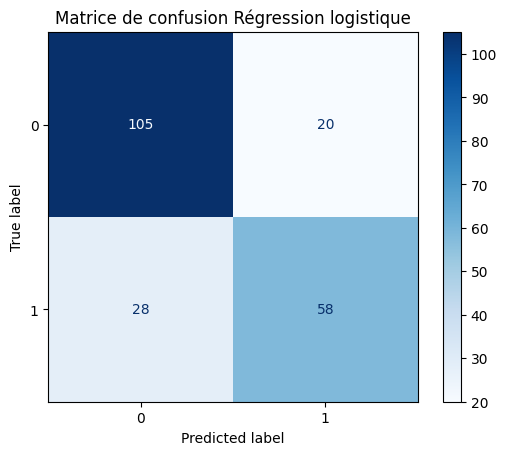

In [53]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues')
plt.title("Matrice de confusion Régression logistique")
plt.grid(False)
plt.show()

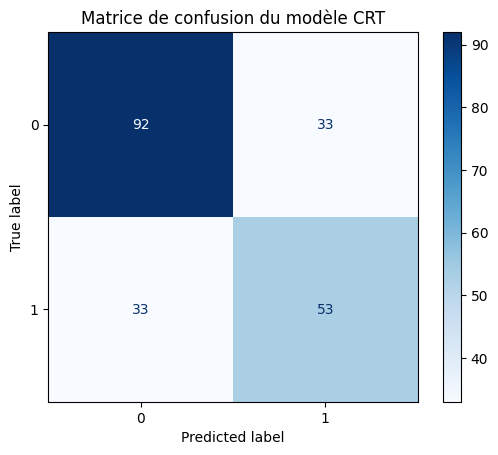

In [54]:
ConfusionMatrixDisplay.from_estimator(crt, X_test, y_test, cmap='Blues')
plt.title("Matrice de confusion du modèle CRT")
plt.grid(False)
plt.show()

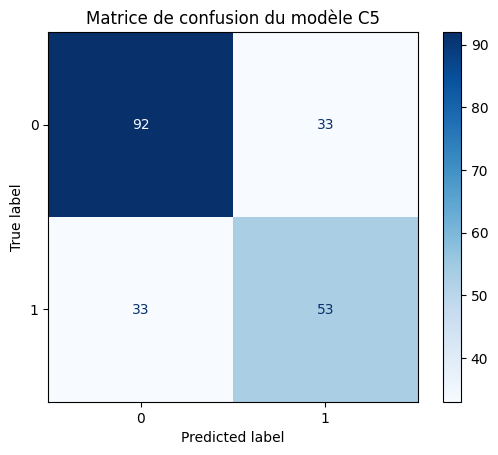

In [55]:
ConfusionMatrixDisplay.from_estimator(c5, X_test, y_test, cmap='Blues')
plt.title("Matrice de confusion du modèle C5")
plt.grid(False)
plt.show()

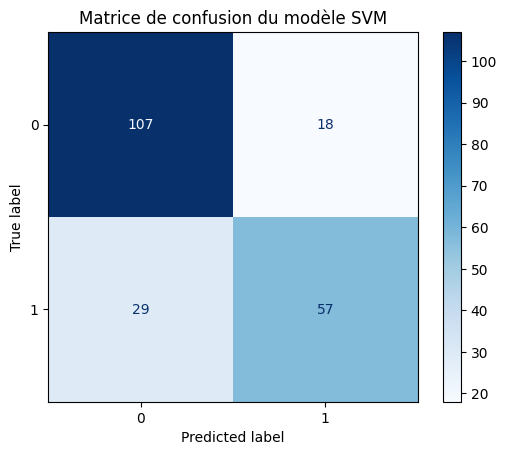

In [56]:
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, cmap='Blues')
plt.title("Matrice de confusion du modèle SVM")
plt.grid(False)
plt.show()

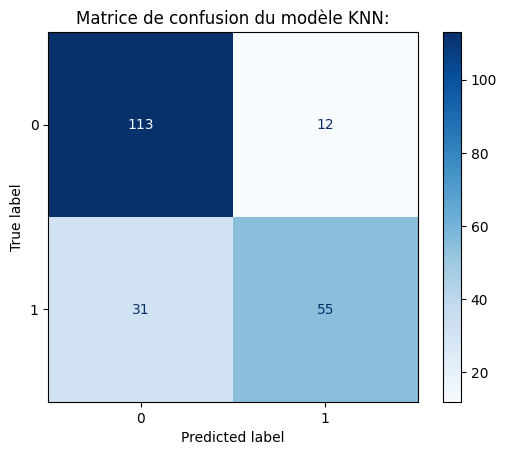

In [57]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Blues')
plt.title("Matrice de confusion du modèle KNN:")
plt.grid(False)
plt.show()

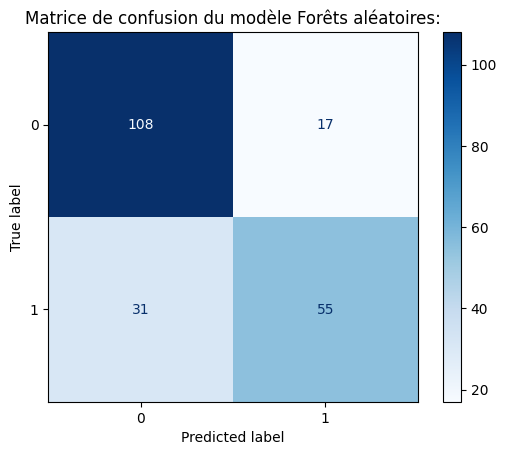

In [58]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title("Matrice de confusion du modèle Forêts aléatoires:")
plt.grid(False)
plt.show()

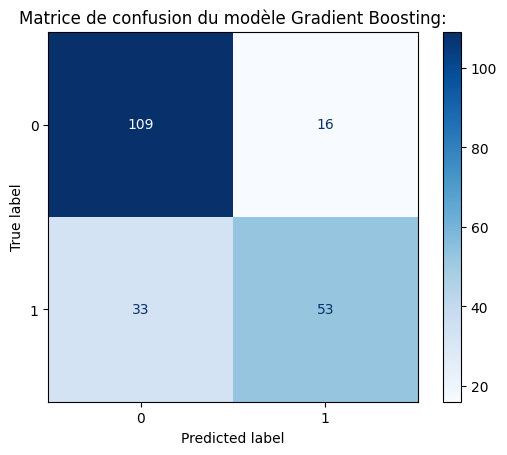

In [59]:
ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test, cmap='Blues')
plt.title("Matrice de confusion du modèle Gradient Boosting:")
plt.grid(False)
plt.show()

**Accuracy des modèles developpés**

In [60]:
print ('Accuracy Model Regression Logistique:', metrics.accuracy_score(y_test, y_predlr))
print ('Accuracy Model CRT:', metrics.accuracy_score(y_test, y_predcrt))
print ('Accuracy Model C5:', metrics.accuracy_score(y_test, y_predc5))
print ('Accuracy Model SVM:', metrics.accuracy_score(y_test, y_predsvm))
print ('Accuracy Model KNN:', metrics.accuracy_score(y_test, y_predknn))
print ('Accuracy Model Random Forest:', metrics.accuracy_score(y_test, y_predrf))
print ('Accuracy Model Gradient Boosting:', metrics.accuracy_score(y_test, y_predgb))

Accuracy Model Regression Logistique: 0.7725118483412322
Accuracy Model CRT: 0.6872037914691943
Accuracy Model C5: 0.6872037914691943
Accuracy Model SVM: 0.7772511848341233
Accuracy Model KNN: 0.7962085308056872
Accuracy Model Random Forest: 0.7725118483412322
Accuracy Model Gradient Boosting: 0.7677725118483413


**Air sous la courbe de ROC des modèles developpés**

In [62]:
print ('Air sous ROC Model Regression Logistique:', roc_auc_score(y_test, y_predlr))
print ('Air sou ROC Model CRT :', roc_auc_score(y_test, y_predcrt))
print ('Air sou ROC Model C5 :', roc_auc_score(y_test, y_predc5))
print ('Air sou ROC Model SVM :', roc_auc_score(y_test, y_predsvm))
print ('Aire sou ROC Model KNN:', roc_auc_score(y_test, y_predknn))
print ('Air sous ROC Model Random Forest:', roc_auc_score(y_test, y_predrf))
print ('Air sous ROC Model Gradient Boosting:', roc_auc_score(y_test, y_predgb))

Air sous ROC Model Regression Logistique: 0.7572093023255813
Air sou ROC Model CRT : 0.6761395348837209
Air sou ROC Model C5 : 0.6761395348837209
Air sou ROC Model SVM : 0.7593953488372092
Aire sou ROC Model KNN: 0.7717674418604651
Air sous ROC Model Random Forest: 0.7517674418604651
Air sous ROC Model Gradient Boosting: 0.744139534883721


**F1 Score des modèles developpés**

In [63]:
print ('f1score Model Regression Logistique:', f1_score(y_test, y_predlr))
print ('f1score Model CRT:', f1_score(y_test, y_predcrt))
print ('f1score Model C5:', f1_score(y_test, y_predc5))
print ('f1score Model SVM:', f1_score(y_test, y_predsvm))
print ('f1score Model KNN:', f1_score(y_test, y_predknn))
print ('f1score Model Random Forest:', f1_score(y_test, y_predrf))
print ('f1score Model Gradient Boosting:', f1_score(y_test, y_predgb))

f1score Model Regression Logistique: 0.7073170731707317
f1score Model CRT: 0.6162790697674418
f1score Model C5: 0.6162790697674418
f1score Model SVM: 0.7080745341614907
f1score Model KNN: 0.7189542483660131
f1score Model Random Forest: 0.6962025316455697
f1score Model Gradient Boosting: 0.6838709677419355


### Réglage des hyperparamètres

In [ ]:
lr.get_params()

In [ ]:
crt.get_params()

In [ ]:
c5.get_params()

In [ ]:
svm.get_params()

In [ ]:
knn.get_params()

In [ ]:
rf.get_params()

In [ ]:
gb.get_params()

### Réglage des hyperparamètres Modèle Random Forest

**Définir les hyperparamètres à régler**

In [64]:
# Définir les hyperparamètres à régler et leurs plages respectives
param_dist = {
    'n_estimators': [10, 50, 100,],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion':  ['gini','entropy','log_loss' ]
}

**Recherche aléatoire des hyperparamètres à régler**

In [65]:
from sklearn.model_selection import  RandomizedSearchCV

In [66]:
# Initialiser RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, random_state=42);
# Effectuer une validation croisée de recherche aléatoire
random_search.fit(X_train, y_train);


**Évaluer le meilleur modèle**

In [67]:
# Obtenez les meilleurs paramètres et le meilleur score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Obtenez le meilleur modèle
best_model_rf_rs = random_search.best_estimator_

# Faire des prédictions sur l'ensemble de test en utilisant le meilleur modèle
y_pred_best_model_rf_rs= best_model_rf_rs.predict(X_test)



**Résultats Recherche aléatoire**

In [68]:
print("Meilleurs hyperparamètres:", best_params)
print("Meilleur score (précision de la validation croisée):", best_score)


print ('Accuracy Model Random Forest avec Meilleurs paramètres (recherche aléatoir):', metrics.accuracy_score(y_test, y_pred_best_model_rf_rs))
print ('Air sous ROC Model Random Forestavec Meilleurs paramètres(recherche aléatoir):', roc_auc_score(y_test,y_pred_best_model_rf_rs))
print ('f1score Model Random Forest avec Meilleurs paramètres(recherche aléatoir):', f1_score(y_test, y_pred_best_model_rf_rs))


Meilleurs hyperparamètres: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'log_loss'}
Meilleur score (précision de la validation croisée): 0.7800659657802516
Accuracy Model Random Forest avec Meilleurs paramètres (recherche aléatoir): 0.7914691943127962
Air sous ROC Model Random Forestavec Meilleurs paramètres(recherche aléatoir): 0.7732093023255813
f1score Model Random Forest avec Meilleurs paramètres(recherche aléatoir): 0.725


**Recherche en grille des hyperparamètres Modèle Random Forest**

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
# Effectuer une recherche de grille avec validation croisée
grid_search = GridSearchCV(rf, param_dist , cv=5);
grid_search.fit(X_train, y_train);

In [71]:
# Obtenez les meilleurs paramètres et le meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Obtenez le meilleur modèle
best_model_rf = grid_search.best_estimator_

# Faire des prédictions sur l'ensemble de test en utilisant le meilleur modèle
y_pred_best_model_rf = best_model_rf.predict(X_test)


In [72]:
print("Meilleurs hyperparamètres:", best_params)
print("Meilleur score (précision de la validation croisée):", best_score)


print ('Accuracy Model Random Forest avec Meilleurs paramètres (recherche aléatoir):', metrics.accuracy_score(y_test,y_pred_best_model_rf))
print ('Air sous ROC Model Random Forestavec Meilleurs paramètres(recherche aléatoir):', roc_auc_score(y_test,y_pred_best_model_rf))
print ('f1score Model Random Forest avec Meilleurs paramètres(recherche aléatoir):', f1_score(y_test,y_pred_best_model_rf))


Meilleurs hyperparamètres: {'criterion': 'log_loss', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}
Meilleur score (précision de la validation croisée): 0.7902082044939188
Accuracy Model Random Forest avec Meilleurs paramètres (recherche aléatoir): 0.7677725118483413
Air sous ROC Model Random Forestavec Meilleurs paramètres(recherche aléatoir): 0.744139534883721
f1score Model Random Forest avec Meilleurs paramètres(recherche aléatoir): 0.6838709677419355


#### Enregistrement du meilleur modèle

In [73]:
import pickle

In [74]:
#Sauvegarde du modèle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model_rf_rs, file)

In [75]:
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [76]:
result = model.predict(X_test)
result

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)